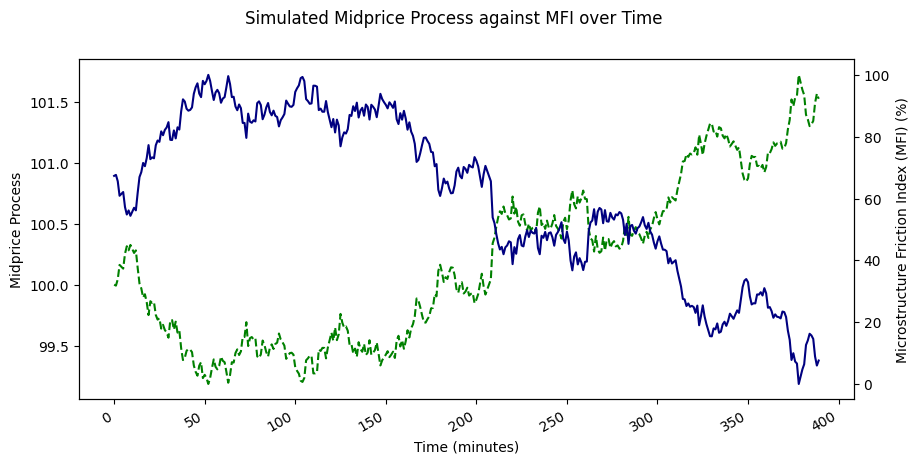

In [123]:
# --- Microstructure Friction Index (LSPI) ---

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Price Process Simulation Parameters ---

S0 = 100
mu = 0.01
sigma = 0.015
n_steps = 390
n_simulations = 1
T = 1
dt = T / n_steps

np.random.seed(42)

S = np.zeros((n_steps, n_simulations))
dW = np.random.standard_normal((n_steps, n_simulations))

for i in range(n_simulations):
    S[0, i] = S0
    for t in range(1, n_steps):
        S[t, i] = S[t - 1, i] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * dW[t, i])

# --- Order Book Layers Simulations ---

bid_prices = [S * (1 - 0.005 * i) for i in range(1, 6)]
ask_prices = [S * (1 + 0.005 * i) for i in range(1, 6)]

bid_depths = np.random.lognormal(mean = 3, sigma = 0.5, size = 5)
ask_depths = np.random.lognormal(mean = 3, sigma = 0.5, size = 5)

# --- Instantaneous Friction Metric Computation ---

total_depth_near_mid = np.sum(bid_depths[:3]) + np.sum(ask_depths[:3])
total_depth_near_mid

bid_ask_spread = np.array(ask_prices) - np.array(bid_prices)

best_bid = bid_prices[0].flatten()
best_ask = ask_prices[0].flatten()

bid_ask_spread = best_ask - best_bid

friction = total_depth_near_mid / bid_ask_spread

friction_series = pd.Series(friction, name = 'Friction')

# --- Microstructure Friction Index (MFI) Construction ---

friction_t = friction_series

microstructure_friction_idx = ((friction_t - min(friction_t)) / (max(friction) - min(friction))) * 100

# --- Data Visualisation ---

fig, ax1 = plt.subplots(figsize = (10, 5));
ax2 = ax1.twinx();
ax1.plot(S, '--', color = 'green');
ax2.plot(microstructure_friction_idx, color = 'navy');
ax1.set_xlabel('Time (minutes)');
ax1.set_ylabel('Midprice Process')
ax2.set_ylabel('Microstructure Friction Index (MFI) (%)');
fig.autofmt_xdate();
fig.align_xlabels();
fig.suptitle('Simulated Midprice Process against MFI over Time');
plt.show();